# Projet IT4A

## Automne 2024

#### GOUILLARDON Nicolas

In [80]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys

In [81]:
sys.setrecursionlimit(10000)

### To do
Petite explication du principe de fonctionnement des algo + commenter le code
Expliquer les résultats, les comparer par rapport aux valeurs théoriques
Expliquer pourquoi on peut avoir ces résultats avec nos propres mots

# Fonctions Utiles

Les deux fonctions données plus bas sont utiles pour tester si un tableau ou un ensemble de tableaux sont bien
triés par ordre ascendant.


In [82]:
def isSorted(l):
    for i in range(len(l) - 1):
        if l[i] > l[i + 1]: return False
    return True

def areSorted(ll):
    for i in range(len(ll)):
        if not isSorted(ll[i]): return (False, i)
    return (True, 0)

# Création des tableaux

La fonction __create\_data__ permet de créer des listes qui contiennent les tableaux à trier avec des tailles
croissantes. Les paramètres par défaut sont 15 tableaux, et des tailles de tableaux qui augmentent  par incrément de 200. Par défaut, le plus petit tableau aura 200 éléments, le plus grand aura 3000 éléments.

In [165]:
"""def create_data(nlist=15, nval=200):

    # Création de listes de taille incrémentale et de contenu aléatoire
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    sizeArrays = []

    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i
        dataRandom = s*[0]
        dataSorted = s*[0]
        dataInversed = s*[0]
        for j in range(s):
            dataRandom[j]=j
            dataSorted[j]=j
            dataInversed[j]=j

        dataInversed.reverse()
        random.shuffle(dataRandom)

        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        sizeArrays.append(s)

    return(sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted)

import random

def create_data(nlist=15, nval=200):
    # Création de listes de taille incrémentale et de contenu varié
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    listDataPartiallySorted = []
    listDataWithDuplicates = []
    sizeArrays = []

    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i
        dataRandom = list(range(s))
        dataSorted = list(range(s))
        dataInversed = list(range(s))
        dataPartiallySorted = list(range(s))
        dataWithDuplicates = [random.choice(range(int(s/2))) for _ in range(s)]  # Listes avec beaucoup de doublons

        # Appliquer les transformations
        dataInversed.reverse()
        random.shuffle(dataRandom)

        # Rendre la moitié du tableau partiellement triée
        half = s // 2
        dataPartiallySorted[half:] = sorted(dataPartiallySorted[half:])

        # Ajouter les listes à leurs ensembles respectifs
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        listDataPartiallySorted.append(dataPartiallySorted)
        listDataWithDuplicates.append(dataWithDuplicates)
        sizeArrays.append(s)

    return (sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted, listDataPartiallySorted, listDataWithDuplicates)"""

import random

def create_data(nlist=15, nval=200):
    # Création de listes de taille incrémentale et de contenu varié
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    listDataPartiallySorted = []
    listDataWithDuplicates = []
    sizeArrays = []

    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i
        dataRandom = list(range(s))
        dataSorted = list(range(s))
        dataInversed = list(range(s))
        dataPartiallySorted = list(range(s))
        dataWithDuplicates = [random.randint(0,s-1) for _ in range(s)]  # Listes avec doublons

        # Appliquer les transformations
        dataInversed.reverse()
        random.shuffle(dataRandom)
        random.shuffle(dataPartiallySorted)

        # Rendre une partie du tableau partiellement triée
        part = s // 2
        dataPartiallySorted[part:] = sorted(dataPartiallySorted[part:])

        # Ajouter les listes à leurs ensembles respectifs
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        listDataPartiallySorted.append(dataPartiallySorted)
        listDataWithDuplicates.append(dataWithDuplicates)
        sizeArrays.append(s)

    return (sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted, listDataPartiallySorted, listDataWithDuplicates)


# Tri des tableaux

La fonction **executerTri** prend en entrée :

- la fonction qui va effectuer le tri **fct_tri**
- la couleur des tracés **color**
- le nom de l'algorithme de tri **nom**
- le nombre de tableaux **nlist** (utilisé par **create_data**)
- le nombre de valeurs dans le premier tableau **nval**  (utilisé par **create_data**)
- un booléen qui indique si le tableau est trié **surplace** ou si le tableau trié est renvoyé comme résultat de la fonction de tri



In [169]:
"""def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace = True):

    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)

    toplotRandom = []
    toplotSorted = []
    toplotInverted = []

    dataTestRandom    = copy.deepcopy(listDataRandom)
    dataTestSorted    = copy.deepcopy(listDataSorted)
    dataTestInverted  = copy.deepcopy(listDataInvertedSorted)

    for i in range(len(axis)):
        time1 = time.time()
        if surplace:
            fct_tri(dataTestRandom[i])
        else:
            dataTestRandom[i] = fct_tri(dataTestRandom[i])
        time2 = time.time()
        toplotRandom.append(time2 - time1)
        time3 = time.time()
        if surplace:
            fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i] = fct_tri(dataTestSorted[i])
        time4 = time.time()
        toplotSorted.append(time4 - time3)
        time5 = time.time()
        if surplace:
            fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i] = fct_tri(dataTestInverted[i])
        time6 = time.time()
        toplotInverted.append(time6 - time5)

    (ok1, ipb1) = areSorted(dataTestRandom)
    (ok2, ipb2) = areSorted(dataTestSorted)
    (ok3, ipb3) = areSorted(dataTestInverted)

    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()
"""


def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace=True):
    axis, listDataRandom, listDataSorted, listDataInvertedSorted, listDataPartiallySorted, listDataWithDuplicates = create_data(nlist, nval)

    # Stockage des résultats pour les nouveaux cas
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    toplotPartial = []
    toplotDuplicates = []

    # Duplication des données pour préserver les listes originales
    dataTestRandom = copy.deepcopy(listDataRandom)
    dataTestSorted = copy.deepcopy(listDataSorted)
    dataTestInverted = copy.deepcopy(listDataInvertedSorted)
    dataTestPartial = copy.deepcopy(listDataPartiallySorted)
    dataTestDuplicates = copy.deepcopy(listDataWithDuplicates)

    # Boucle sur les tailles d'axes
    for i in range(len(axis)):
        # Mesure des temps pour chaque cas
        for dataType, toplot, dataTest in [
            (dataTestRandom, toplotRandom, dataTestRandom),
            (dataTestSorted, toplotSorted, dataTestSorted),
            (dataTestInverted, toplotInverted, dataTestInverted),
            (dataTestPartial, toplotPartial, dataTestPartial),
            (dataTestDuplicates, toplotDuplicates, dataTestDuplicates)
        ]:
            time1 = time.time()
            if surplace:
                fct_tri(dataTest[i])
            else:
                dataTest[i] = fct_tri(dataTest[i])
            time2 = time.time()
            toplot.append(time2 - time1)

    # Tracé des résultats pour chaque type de données
    plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    plt.plot(axis, toplotSorted, '--' + 'b', label=nom + ' (sorted)')
    plt.plot(axis, toplotInverted, ':' + 'g', label=nom + ' (inverted)')
    plt.plot(axis, toplotPartial, '-.' + 'y', label=nom + ' (partial)')
    plt.plot(axis, toplotDuplicates, ':' + color, label=nom + ' (duplicates)')
    plt.legend()
    plt.show()

# fonction mettant en concurrence une liste de fonctions de tri, pour un type de données (tableau random, trié, inversé, partiellement trié, avec doublons)
def executerTriConcurrence(liste_fct_tri, liste_noms, liste_couleurs=['r', 'y', 'g', 'b', 'm','c'], nlist=15, nval=200, surplace=True, liste=['random', 'sorted', 'inverted', 'partial', 'duplicates']):
    axis, listDataRandom, listDataSorted, listDataInvertedSorted, listDataPartiallySorted, listDataWithDuplicates = create_data(nlist, nval)

    # Stockage des résultats pour les nouveaux cas
    toplot = {case: [[] for _ in range(len(liste_fct_tri))] for case in liste}

    # Duplication des données pour préserver les listes originales
    dataTest = {
        'random': [copy.deepcopy(listDataRandom) for _ in range(len(liste_fct_tri))],
        'sorted': [copy.deepcopy(listDataSorted) for _ in range(len(liste_fct_tri))],
        'inverted': [copy.deepcopy(listDataInvertedSorted) for _ in range(len(liste_fct_tri))],
        'partial': [copy.deepcopy(listDataPartiallySorted) for _ in range(len(liste_fct_tri))],
        'duplicates': [copy.deepcopy(listDataWithDuplicates) for _ in range(len(liste_fct_tri))]
    }
    liste_symboles = {'random':'-', 'sorted':'--','inverted':':','partial': '-.','duplicates': '-'}

    # Boucle sur les tailles d'axes
    for i in range(len(axis)):
        # Mesure des temps pour chaque cas
        for case in liste:
            for j in range(len(liste_fct_tri)):
                time1 = time.time()
                if surplace:
                    liste_fct_tri[j](dataTest[case][j][i])
                else:
                    dataTest[case][j][i] = liste_fct_tri[j](dataTest[case][j][i])
                time2 = time.time()
                toplot[case][j].append(time2 - time1)

    # Tracé des résultats pour chaque type de données
    for case in liste:
        for i in range(len(liste_fct_tri)):
            plt.plot(axis, toplot[case][i], liste_symboles[case] + liste_couleurs[i], label=liste_noms[i] + ' (' + case + ')')
    plt.legend()
    plt.show()

"""
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace=True):
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)

    toplotRandom = []
    toplotSorted = []
    toplotInverted = []

    dataTestRandom = copy.deepcopy(listDataRandom)
    dataTestSorted = copy.deepcopy(listDataSorted)
    dataTestInverted = copy.deepcopy(listDataInvertedSorted)

    for i in range(len(axis)):
        time1 = time.time()
        if surplace:
            _, cpt_comp, cpt_swap = fct_tri(dataTestRandom[i])  # Appel à la fonction de tri avec statistiques
        else:
            dataTestRandom[i], cpt_comp, cpt_swap = fct_tri(dataTestRandom[i])
        time2 = time.time()
        toplotRandom.append(time2 - time1)

        time3 = time.time()
        if surplace:
            _, cpt_comp, cpt_swap = fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i], cpt_comp, cpt_swap = fct_tri(dataTestSorted[i])
        time4 = time.time()
        toplotSorted.append(time4 - time3)

        time5 = time.time()
        if surplace:
            _, cpt_comp, cpt_swap = fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i], cpt_comp, cpt_swap = fct_tri(dataTestInverted[i])
        time6 = time.time()
        toplotInverted.append(time6 - time5)

    # Vérification des listes triées et tracés
    (ok1, ipb1) = areSorted(dataTestRandom)
    (ok2, ipb2) = areSorted(dataTestSorted)
    (ok3, ipb3) = areSorted(dataTestInverted)

    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()
"""


"\ndef executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace=True):\n    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)\n\n    toplotRandom = []\n    toplotSorted = []\n    toplotInverted = []\n\n    dataTestRandom = copy.deepcopy(listDataRandom)\n    dataTestSorted = copy.deepcopy(listDataSorted)\n    dataTestInverted = copy.deepcopy(listDataInvertedSorted)\n\n    for i in range(len(axis)):\n        time1 = time.time()\n        if surplace:\n            _, cpt_comp, cpt_swap = fct_tri(dataTestRandom[i])  # Appel à la fonction de tri avec statistiques\n        else:\n            dataTestRandom[i], cpt_comp, cpt_swap = fct_tri(dataTestRandom[i])\n        time2 = time.time()\n        toplotRandom.append(time2 - time1)\n\n        time3 = time.time()\n        if surplace:\n            _, cpt_comp, cpt_swap = fct_tri(dataTestSorted[i])\n        else:\n            dataTestSorted[i], cpt_comp, cpt_swap = fct_tri(dataTestSorted[i])\n        time

# Algorithme de tri

l'algorithme **bubble_sort** est donné en exemple

In [85]:
def bubble_sort(A):
    n = len(A)
    cpt= 0 # compteur de permutations
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            if A[j]>A[j+1]:            
                t = A[j]
                A[j]=A[j+1]
                A[j+1] = t
                flag = 1
                cpt += 1
        if flag == 0:
            break
    return A,cpt

def bubble_sort_optimized(A):
    n = len(A)
    while n > 1:
        newn = 0
        for i in range(1, n):
            if A[i-1] > A[i]:
                # Échange des éléments
                A[i-1], A[i] = A[i], A[i-1]
                # Mise à jour de la position du dernier échange
                newn = i
        # Réduction de la portée du tri à la dernière position échangée
        n = newn
    return A

def bubble_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            cpt_comp += 1
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
                flag = 1
                cpt_swap += 1
        if flag == 0:
            break
    return A, cpt_comp, cpt_swap



In [86]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if A[j] < A[min_idx]:
                min_idx = j
        if min_idx != i:
            t = A[i]
            A[i] = A[min_idx]
            A[min_idx] = t
    return A

def selection_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            cpt_comp += 1  # comparaison entre A[j] et A[min_idx]
            if A[j] < A[min_idx]:
                min_idx = j
        if min_idx != i:
            A[i], A[min_idx] = A[min_idx], A[i]
            cpt_swap += 1  # permutation
    return A, cpt_comp, cpt_swap


In [87]:
def insertion_sort(A):
    n = len(A)
    for i in range(1, n):
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key
    return A

def insertion_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    for i in range(1, n):
        x = A[i]
        j = i - 1
        while j >= 0 and A[j] > x:
            cpt_comp += 1  # comparaison entre A[j] et x
            A[j + 1] = A[j]  # décalage à droite
            j -= 1
            cpt_swap += 1  # décalage est considéré comme un "swap"
        A[j + 1] = x
        if j >= 0:  # Pour compter la dernière comparaison
            cpt_comp += 1
    return A, cpt_comp, cpt_swap


In [88]:
def heapify(A, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and A[l] > A[largest]:
        largest = l
    if r < n and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        heapify(A, n, largest)

def heap_sort(A):
    n = len(A)
    for i in range(n//2 - 1, -1, -1):
        heapify(A, n, i)
    for i in range(n-1, 0, -1):
        A[i], A[0] = A[0], A[i]
        heapify(A, i, 0)
    return A

def heapify_stats(A, n, i, cpt_comp, cpt_swap):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n:
        cpt_comp += 1  # comparaison entre A[left] et A[largest]
        if A[left] > A[largest]:
            largest = left

    if right < n:
        cpt_comp += 1  # comparaison entre A[right] et A[largest]
        if A[right] > A[largest]:
            largest = right

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        cpt_swap += 1  # permutation
        cpt_comp, cpt_swap = heapify(A, n, largest, cpt_comp, cpt_swap)

    return cpt_comp, cpt_swap

def heap_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations

    for i in range(n // 2 - 1, -1, -1):
        cpt_comp, cpt_swap = heapify_stats(A, n, i, cpt_comp, cpt_swap)

    for i in range(n - 1, 0, -1):
        A[0], A[i] = A[i], A[0]
        cpt_swap += 1  # permutation
        cpt_comp, cpt_swap = heapify_stats(A, i, 0, cpt_comp, cpt_swap)

    return A, cpt_comp, cpt_swap


In [89]:
def partition(A, start, end):
    pivot = A[end]
    i = start - 1
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations

    for j in range(start, end):
        cpt_comp += 1  # comparaison entre A[j] et pivot
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
            cpt_swap += 1  # permutation

    A[i + 1], A[end] = A[end], A[i + 1]
    cpt_swap += 1  # permutation
    return i + 1, cpt_comp, cpt_swap

def quick_sort_with_stats(A, start, end):
    if start < end:
        pivot_index, cpt_comp, cpt_swap = partition(A, start, end)
        
        left_comp, left_swap = quick_sort_with_stats(A, start, pivot_index - 1)
        right_comp, right_swap = quick_sort_with_stats(A, pivot_index + 1, end)

        # Totaliser les comparaisons et les swaps
        cpt_comp += left_comp + right_comp
        cpt_swap += left_swap + right_swap

        return cpt_comp, cpt_swap

    return 0, 0  # Retourne 0 comparaisons et 0 swaps si la condition de récursion n'est pas remplie

def quick_sort_main_with_stats(A):
    cpt_comp, cpt_swap = quick_sort_with_stats(A, 0, len(A) - 1)
    return A, cpt_comp, cpt_swap


In [90]:
def merge(left, right, cpt_comp, cpt_swap):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        cpt_comp += 1  # comparaison entre left[i] et right[j]
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            cpt_swap += 1  # permutation
    result.extend(left[i:])
    result.extend(right[j:])
    return result, cpt_comp, cpt_swap

def merge_sort_with_stats(A):
    if len(A) <= 1:
        return A, 0, 0  # Retourner le tableau et 0 comparaisons et 0 swaps

    mid = len(A) // 2
    left, cpt_comp_left, cpt_swap_left = merge_sort_with_stats(A[:mid])
    right, cpt_comp_right, cpt_swap_right = merge_sort_with_stats(A[mid:])

    merged, cpt_comp_merge, cpt_swap_merge = merge(left, right, cpt_comp_left + cpt_comp_right, cpt_swap_left + cpt_swap_right)
    
    return merged, cpt_comp_merge, cpt_swap_merge


Les variations observées sur le graphe pour le **tri par tas (Heap Sort)** peuvent être attribuées à plusieurs facteurs intrinsèques à l'algorithme, et plus particulièrement à la manière dont le **tas** est construit et réorganisé à chaque étape. Voici quelques explications possibles pour ces fluctuations :

### 1. **Construction initiale du tas**
- La première étape de Heap Sort consiste à construire un **tas binaire** (max-heap ou min-heap) à partir du tableau donné.
- Cette phase de **construction du tas** a une complexité de **O(n)**. Cependant, la manière dont les éléments sont organisés dans le tableau initial peut influencer la rapidité avec laquelle le tas est construit. Pour certains ordres des éléments (quasi-triés, tableaux inversés), cette phase peut être plus rapide ou plus lente, entraînant des variations dans le temps d'exécution.
  
### 2. **Réorganisation après chaque extraction**
- Après avoir extrait l'élément maximum (ou minimum), l'algorithme doit réorganiser le tas pour restaurer la propriété du tas (les parents sont plus grands que leurs enfants).
- La complexité de cette opération dépend de la hauteur du tas, qui est logarithmique en fonction du nombre d'éléments restants dans le tas (complexité **O(log n)**). Cependant, les opérations de réorganisation peuvent varier en fonction de la structure du tas à chaque étape.
- Pour certains tableaux d'entrée, le nombre de réorganisations nécessaires pour restaurer l'ordre peut fluctuer, créant ainsi des **variations de performances**.

### 3. **Nature des données d'entrée**
- **Cas aléatoire** : Dans un tableau généré aléatoirement, les éléments sont répartis de manière imprévisible, ce qui entraîne des différences dans la profondeur des réorganisations du tas. Certaines réorganisations nécessitent plus de déplacements que d'autres, surtout lorsque les valeurs sont distribuées de manière inégale.
- **Cas partiellement trié** : Si le tableau est presque trié ou présente certaines structures particulières, cela peut provoquer des variations inattendues dans la phase de réorganisation du tas, d'où des fluctuations du temps d'exécution.

### 4. **Facteurs cachés dans l'implémentation**
- Dans certaines implémentations, des **facteurs cachés** comme la gestion de la mémoire, l'accès au cache, ou même l'efficacité des échanges d'éléments peuvent influencer les performances. En particulier, dans les tableaux de grandes tailles, les variations d'accès à la mémoire peuvent affecter les temps de traitement.

### 5. **Phases distinctes dans Heap Sort**
- Le tri par tas se compose de deux phases distinctes :
  1. La **construction du tas** initial à partir du tableau donné.
  2. L'**extraction et réorganisation** après chaque retrait de l'élément maximum.
  
  Les performances peuvent varier entre ces deux phases, et il se peut que les variations que vous observez sur le graphe soient dues à une fluctuation dans la réorganisation du tas après chaque extraction. Par exemple, certains tas nécessitent plus de réorganisations que d'autres en fonction de la distribution des éléments.

### Synthèse des causes des variations
- **Variations dans la construction du tas** : Certaines distributions des données entraînent un tas initial plus ou moins difficile à construire.
- **Variations dans la réorganisation du tas** : À chaque extraction, la profondeur et la structure du tas restant varient, entraînant des fluctuations dans le nombre d'opérations nécessaires.
- **Nature aléatoire des données** : Les données aléatoires peuvent entraîner des variations dans la manière dont les éléments sont organisés dans le tas.
- **Facteurs matériels et d'implémentation** : Des détails comme l'accès à la mémoire peuvent jouer un rôle pour des tableaux de grande taille.

### Conclusion
Les fluctuations dans le graphe pour le tri par tas proviennent donc principalement de la manière dont l'algorithme traite la réorganisation du tas à chaque étape, en particulier lors de l'extraction des éléments et de la restauration de l'ordre du tas. Les caractéristiques des données d'entrée (aléatoires, partiellement triées, etc.) peuvent grandement affecter ces étapes, provoquant des variations visibles sur le graphe.

In [91]:
"""def quick_sort(A):
    if len(A) <= 1:
        return A
    else:
        pivot = A[len(A) // 2]
        left = [x for x in A if x < pivot]
        middle = [x for x in A if x == pivot]
        right = [x for x in A if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)"""
def quick_sort(A, start=0, end=None):
    if end is None:
        end = len(A) - 1
    if start < end:
        iPivot = partition(A, start, end)
        quick_sort(A, start, iPivot - 1)
        quick_sort(A, iPivot + 1, end)
    return A

def partition(A, start, end):
    pivot = A[end]
    iPivot = start
    for i in range(start, end):
        if A[i] <= pivot:
            A[i], A[iPivot] = A[iPivot], A[i]  # Swap elements
            iPivot += 1
    A[iPivot], A[end] = A[end], A[iPivot]  # Swap pivot into correct position
    return iPivot

In [92]:
def merge_sort(A):
    if len(A) > 1:
        mid = len(A) // 2
        L = A[:mid]
        R = A[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                A[k] = L[i]
                i += 1
            else:
                A[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            A[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            A[k] = R[j]
            j += 1
            k += 1
    return A

# Complexité empirique

le résultat de **executer_tri** avec l'algorithme **bubble_sort** est donné en exemple

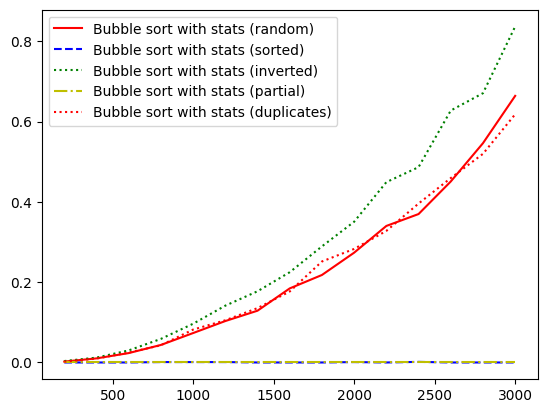

In [93]:
executerTri(bubble_sort_with_stats,'r','Bubble sort with stats')

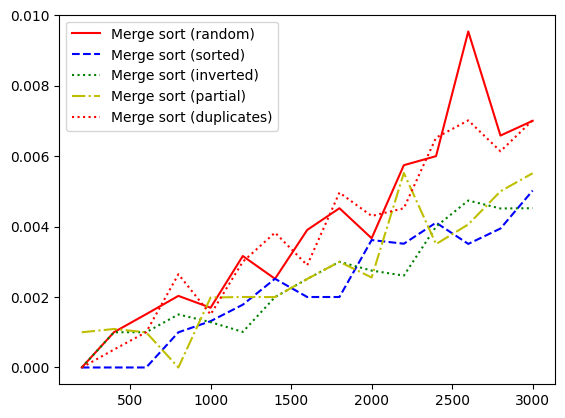

In [94]:
executerTri(merge_sort_with_stats, 'r', 'Merge sort')

Sur la figure précédente

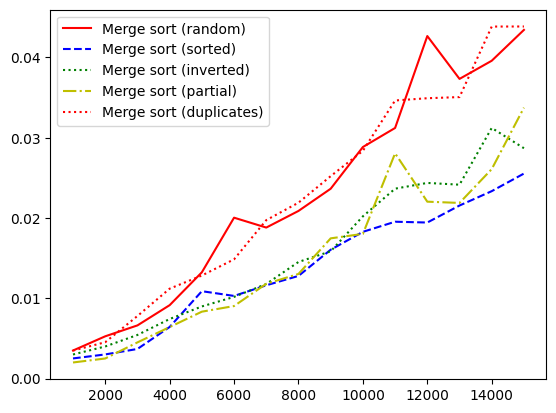

In [95]:
executerTri(merge_sort_with_stats, 'r', 'Merge sort',15,1000)

In [96]:
executerTri(quick_sort_main_with_stats, 'r', 'Quick sort')

TypeError: cannot unpack non-iterable int object

### Cas moyen

et pour tout $n \in \mathbb{N}$, $u_{n+1} = u_n + 1$


### Pire cas

 - tableau trié de façon décroissante
    - 15
    14 +

C'est la somme des entiers de 1 à n-1

En s'intéressant uniquement au nombre de permutations de 2 valeurs. (étant donné que c'est l'opération la plus coûteuse)

$ N_{permutations} = \frac{n \cdot (n-1)}{2}$ donc $ O(n) = n^2$

### Preuve


In [ ]:
"""def calculate_average_case(sort_function, num_lists=15, num_values=200):
    operations = []
    sizes = []
    NOMBRE_LISTES = 2
    nb_operations_pour_chaque_taille = [num_lists]
    # creation des tableaux
    for k in range(NOMBRE_LISTES):
        size_arrays, random_data_list, _, _ = create_data(num_lists, num_values)
        for i, data in enumerate(random_data_list):
            print(i, data)
            _, ops = sort_function(data)
            nb_operations_pour_chaque_taille[i] += ops
        nb_operations_pour_chaque_taille[k] /= NOMBRE_LISTES



    plt.plot([y for y in range(num_lists,num_lists*num_values,num_lists)], nb_operations_pour_chaque_taille,label='Number of operations')
    plt.xlabel('Size of array')
    plt.ylabel('Number of operations')
    plt.title('Number of operations per array size')
    plt.legend()
    plt.show()

    return mean_operations

# Example usage with bubble_sort
average_case_bubble_sort = calculate_average_case(bubble_sort)
print(f"Average case for bubble_sort: {average_case_bubble_sort}")"""


0 [10, 183, 43, 25, 76, 171, 112, 172, 191, 82, 66, 179, 197, 169, 69, 124, 63, 15, 155, 72, 177, 17, 95, 131, 45, 147, 96, 149, 195, 132, 36, 141, 164, 47, 170, 11, 198, 42, 175, 24, 75, 139, 54, 121, 74, 35, 152, 106, 165, 44, 99, 48, 21, 84, 120, 50, 196, 184, 144, 150, 7, 186, 57, 32, 94, 138, 115, 40, 107, 174, 151, 188, 117, 78, 146, 67, 129, 85, 192, 56, 122, 19, 51, 113, 180, 39, 105, 126, 133, 98, 140, 109, 199, 20, 79, 83, 58, 92, 55, 111, 88, 46, 60, 145, 38, 12, 194, 173, 142, 30, 182, 143, 178, 157, 159, 16, 73, 37, 9, 166, 168, 59, 53, 100, 13, 181, 34, 18, 33, 87, 29, 190, 176, 154, 64, 2, 41, 148, 31, 167, 114, 8, 5, 91, 22, 130, 80, 161, 68, 128, 86, 118, 116, 104, 14, 6, 4, 93, 163, 62, 187, 189, 27, 0, 185, 49, 160, 1, 136, 89, 26, 135, 137, 158, 103, 3, 153, 110, 101, 156, 123, 23, 90, 193, 77, 125, 28, 119, 102, 97, 52, 134, 127, 61, 108, 65, 70, 81, 71, 162]
1 [125, 84, 158, 110, 163, 253, 69, 249, 62, 320, 140, 206, 391, 0, 10, 126, 305, 293, 3, 29, 244, 276, 39,

IndexError: list index out of range

In [ ]:
bubble_sort([13,12,11,10,9,8,7,6,5,4,3,2,1,0])
a = []
for l in range (50):
    k = bubble_sort([random.randint(0,l) for _ in range(l)])
    a.append(k[1])
print(a,np.mean(a))

[0, 0, 0, 2, 2, 5, 8, 12, 11, 19, 19, 18, 34, 32, 47, 56, 71, 56, 73, 75, 103, 99, 113, 113, 121, 174, 120, 187, 199, 241, 194, 228, 241, 265, 266, 322, 320, 373, 319, 398, 400, 470, 400, 380, 430, 506, 550, 527, 513, 455] 191.34


##### Définition

La notation de Landau (Grand O) exprime une borne supérieure sur le comportement asymptotique d'une fonction. Si une fonction $( f(n) )$ est $( O(g(n)) )$.

Cela signifie qu'il existe des constantes positives $( c )$ et $( n_0 )$ telles que pour tout $( n \geq n_0 ), ( f(n) \leq c \cdot g(n) ). $

Formellement : $[ f(n) = O(g(n)) \iff \exists c > 0, \exists n_0 > 0, \forall n \geq n_0, f(n) \leq c \cdot g(n) ]$

##### Interprétation

$( n )$ : Taille de l'entrée.

$( f(n) )$ : Fonction représentant le nombre d'opérations ou l'utilisation de la mémoire de l'algorithme.

$( g(n) )$ : Fonction de référence qui décrit la croissance asymptotique.

$( c )$ : Constante multiplicative.

$( n_0 )$ : Seuil à partir duquel l'inégalité est vérifiée.


## $\color{red}{\text{Brève présentation de la théorie de la complexité}}$

#### Historique

La théorie de la complexité étudie les ressources nécessaires pour résoudre des problèmes computationnels. Son histoire remonte aux débuts de l'informatique théorique dans les années 60, lorsque des chercheurs ont commencé à formaliser la notion de calculabilité et à classer les problèmes en fonction de leur difficulté.

Au début, des pionniers comme Alan Turing ont posé les bases avec le concept de la machine de Turing, qui a permis de définir ce qui peut être calculé. Dans les années 70, des chercheurs tels que Stephen Cook ont introduit la notion de NP-complet, établissant un lien crucial entre différents problèmes et posant la question de savoir si P (problèmes résolubles en temps polynomial) est égal à NP (problèmes dont la solution peut être vérifiée en temps polynomial).

Le théorème de Cook en 1971 a prouvé que certains problèmes, comme le problème du voyageur de commerce, sont NP-complets. Cette classification des problèmes a motivé des travaux sur des algorithmes approximatifs et heuristiques pour traiter des problèmes difficiles.

## Application aux algorithmes de Tri

Pour déterminer la complexité d'un algorithme de tri, on analyse le nombre d'opérations nécessaires pour trier une liste d'éléments en fonction de la taille de la liste, généralement notée $n$.

**On procède par étapes :**

 - **Analyser les opérations de base :** Identifier les opérations fondamentales (comparaisons, échanges) effectuées par l'algorithme.

 - **Cas moyen, meilleur et pire cas :** Évaluer le nombre d'opérations dans différents scénarios :

 - **Meilleur cas :** La situation où l'algorithme effectue le moins d'opérations.

 - **Pire cas :** La situation où l'algorithme effectue le plus d'opérations.

 - **Cas moyen :** La situation moyenne, souvent calculée en utilisant des probabilités.

 - **Exprimer en fonction de $n$ :** Formuler le nombre d'opérations en fonction de la taille de la liste $n$.

 - **Notation grand O :** Utiliser la notation grand O pour exprimer la complexité asymptotique, qui donne une idée de la croissance du nombre d'opérations en fonction de $n$.

(généré par gpt)
### Introduction

L'étude des algorithmes de tri est une composante fondamentale de l'informatique, tant par sa pertinence théorique que pratique. La **complexité** d'un algorithme, définie par le nombre d'opérations élémentaires nécessaires pour traiter des données, est directement liée à la **quantité de ressources** qu'il mobilise. Ces ressources incluent non seulement le **temps de calcul** (mesuré en fonction du nombre d'instructions exécutées), mais aussi l'**espace mémoire** et, dans une perspective plus moderne, la **consommation énergétique**.

Le temps de calcul, souvent exprimé en fonction de la taille des données \(n\), est une mesure clé pour évaluer l'efficacité d'un algorithme. La capacité à gérer des volumes croissants de données de manière rapide est cruciale dans de nombreux domaines, qu'il s'agisse du traitement de grands ensembles de données dans le Big Data, ou de l'optimisation des temps de réponse dans des systèmes embarqués. À une époque où l'explosion des données numériques (vidéos, images, transactions, capteurs, etc.) impose des contraintes de plus en plus sévères sur les infrastructures informatiques, l'efficacité des algorithmes a un impact direct sur le **coût d'exploitation**.

Au-delà du simple temps de calcul, il est de plus en plus essentiel de considérer la **consommation énergétique** des algorithmes. Les serveurs qui traitent de grandes quantités de données consomment des ressources en électricité, ce qui alourdit non seulement les coûts économiques, mais aussi l'empreinte écologique des systèmes informatiques. Un algorithme peu performant pourra non seulement ralentir le traitement, mais également augmenter les besoins en énergie pour un calcul donné.

Par conséquent, dans un monde où l'efficacité informatique est cruciale pour réduire les coûts et limiter l'impact environnemental, la compréhension de la **complexité algorithmique** devient primordiale. C'est dans cette optique que nous étudions ici plusieurs algorithmes de tri – Bubble Sort, Selection Sort, Insertion Sort, Heap Sort, Quick Sort, et Merge Sort – en analysant leur complexité théorique et leur performance empirique. Cette étude nous permettra de comparer les **ressources** mobilisées par chacun (temps, espace, énergie) et d’en tirer des conclusions pour optimiser l'utilisation des algorithmes selon les contextes d'application.

# TEST area


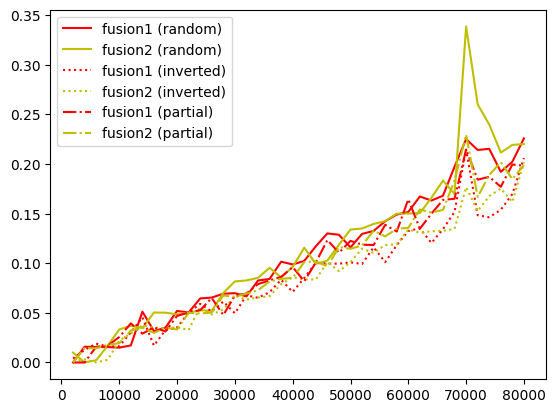

In [174]:
executerTriConcurrence([merge_sort,merge_sort], ['fusion1','fusion2'], ['r', 'y', 'g', 'b'], nlist=40, nval=2000, surplace=True, liste=['random', 'inverted', 'partial'])

## Les différentes données

**Tableaux :** 
- aléatoires
- triés
- inversés
- partiellment triés (la moitié est triée)
- avec doublons


In [168]:
longueur = 15
i = 1
for h in ['aléatoire','trié','inversé','partiellement trié','avec doublons']:
    print(h, create_data(1,longueur)[i])
    i += 1


aléatoire [[9, 2, 6, 13, 14, 12, 5, 1, 4, 8, 7, 0, 11, 3, 10]]
trié [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
inversé [[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]]
partiellement trié [[8, 10, 0, 5, 3, 2, 9, 1, 4, 6, 7, 11, 12, 13, 14]]
avec doublons [[2, 9, 3, 6, 13, 0, 3, 10, 0, 7, 14, 4, 11, 14, 2]]
